In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import random

In [107]:
gradient = random.random() + 0.5
intercept = 2 * random.random() - 1

In [108]:
X = np.random.random((300)) * 10
Y = gradient * X + intercept + np.random.normal(loc=0, scale=2.5, size=(300))

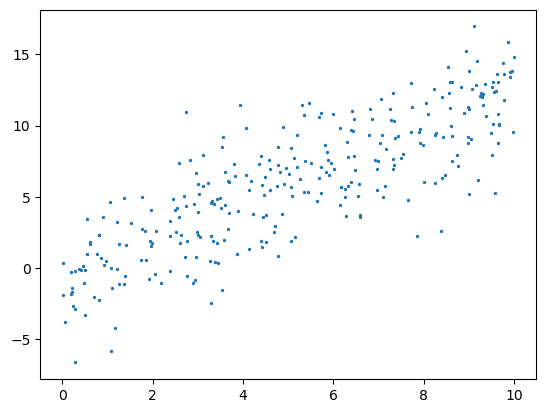

In [109]:
plt.scatter(X, Y, s=2)

### How to calculate coefficients of best fit line
#### $\left(X_a^T X_a\right)^{-1} X_a^T Y = \beta$,   $\beta = \begin{pmatrix} b \\ m \end{pmatrix}$
#### $X_a = \begin{pmatrix} 1 & X \end{pmatrix}$

In [112]:
X_a = np.asarray([np.ones(len(X)), X]).T

In [113]:
X_a[:3]

array([[1.        , 9.52578597],
       [1.        , 2.50615978],
       [1.        , 5.1948667 ]])

In [114]:
beta = np.linalg.inv(X_a.T @ X_a) @ X_a.T @ Y

In [115]:
beta

array([-0.65901153,  1.29336029])

#### $y = mx + b$
#### $y = \beta_1x + \beta_0$

In [116]:
x_line = np.linspace(0, 10, 1000)
y_line = beta[1] * x_line + beta[0]

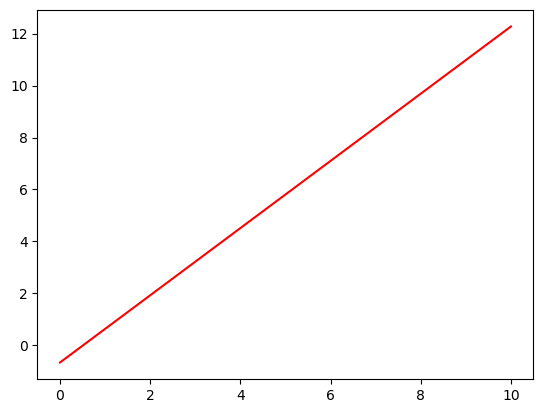

In [117]:
plt.plot(x_line, y_line, color='r')

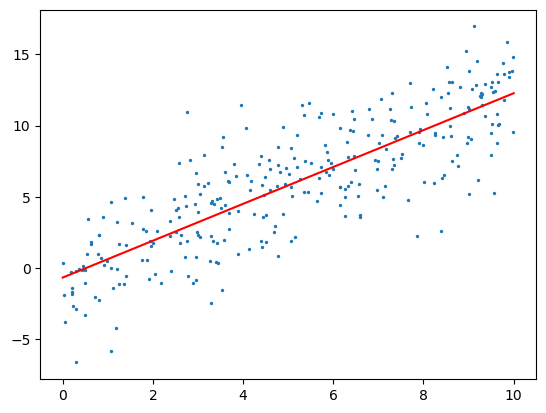

In [118]:
plt.scatter(X, Y, s=2)
plt.plot(x_line, y_line, color='r')

#### Comparison with sklearn best fit

In [119]:
model = LinearRegression()

In [120]:
reg = model.fit(X.reshape(-1, 1), Y)

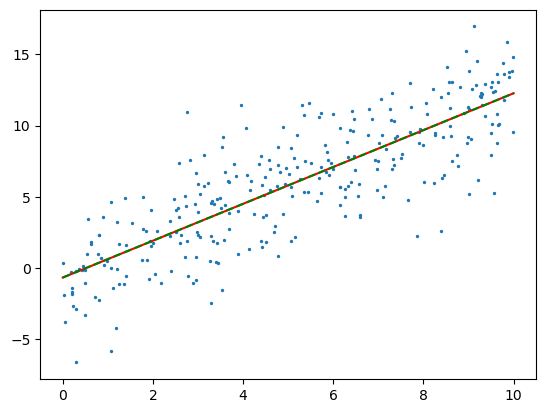

In [122]:
x_line_reg = np.linspace(0, 10, 1000)
y_line_reg = reg.coef_ * x_line + reg.intercept_

plt.scatter(X, Y, s=2)
plt.plot(x_line, y_line, color='r')
plt.plot(x_line_reg, y_line_reg, color='g', linestyle='--')

In [123]:
print(beta[0] - reg.intercept_)
print(beta[1] - reg.coef_)

-4.773959005888173e-15
[6.66133815e-16]


In [40]:
def best_fit(x, y):
    """
    Returns (intercept, gradient)
    """
    x_a = np.asarray([np.ones(len(x)), x]).T
    return np.linalg.inv(x_a.T @ x_a) @ x_a.T @ y

### Square data

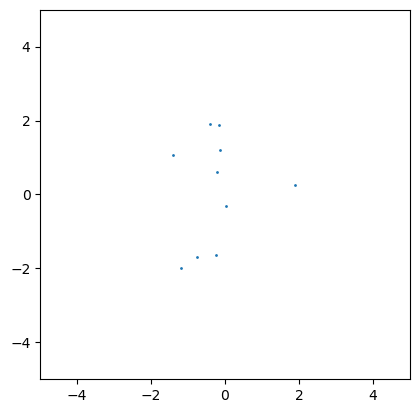

In [96]:
X_square = np.random.random((10)) * 4 - 2
Y_square = np.random.random((10)) * 4 - 2

plt.scatter(X_square, Y_square, s=1)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.gca().set_aspect('equal')

In [97]:
beta = best_fit(X_square, Y_square)

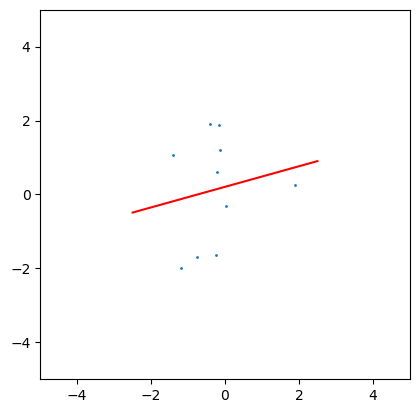

In [98]:
x_line = np.linspace(-2.5, 2.5, 1000)
y_line = beta[1] * x_line + beta[0]

plt.scatter(X_square, Y_square, s=1)
plt.plot(x_line, y_line, color='r')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.gca().set_aspect('equal')

### Circle data

In [92]:
angles = np.random.random((10)) * 2 * np.pi

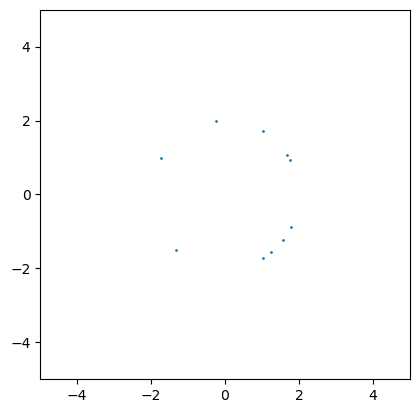

In [93]:
R = 2
X_circle = R * np.cos(angles)
Y_circle = R * np.sin(angles)

plt.scatter(X_circle, Y_circle, s=1)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.gca().set_aspect('equal')

In [94]:
beta = best_fit(X_circle, Y_circle)

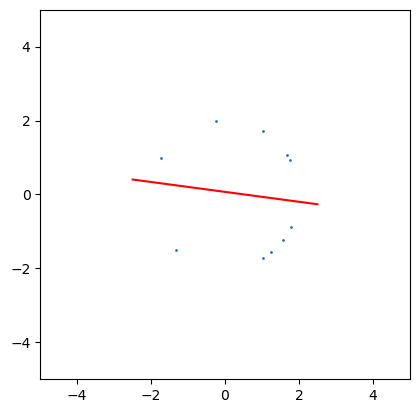

In [95]:
x_line = np.linspace(-2.5, 2.5, 1000)
y_line = beta[1] * x_line + beta[0]

plt.scatter(X_circle, Y_circle, s=1)
plt.plot(x_line, y_line, color='r')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.gca().set_aspect('equal')